In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\ndang\\Downloads\\DATA475\\Project\\SQF_2012_cleaned.csv")

### Attributes statistics

In [ ]:
# precint ==> Geographical area
df['precinct'] = pd.to_numeric(df['precinct'], errors='coerce')

# Precinct statistics
print("\n--- Precinct Statistics ---")
print("Count (non-missing):", df['precinct'].count())
print("Unique precincts:", df['precinct'].nunique())
print("Minimum (range start):", df['precinct'].min())
print("Maximum (range end):", df['precinct'].max())
print("Mean:", round(df['precinct'].mean(), 2))
print("Median:", df['precinct'].median())
print("Mode (most frequent):", df['precinct'].mode()[0])
print("Variance:", round(df['precinct'].var(), 2))

# Top 10 precincts by number of stops
print("\n--- Top 10 Precincts by Stop Count ---")
print(df['precinct'].value_counts().head(10))

In [ ]:
# Sex
# Check how many unique values exist
print("\nUnique values:", df['sex'].unique())

#Get counts of each gender
print("\n--- Gender Counts ---")
print(df['sex'].value_counts())

#Get proportion (percentage) of each gender
print("\n--- Gender Percentage ---")
print(round(df['sex'].value_counts(normalize=True) * 100, 2))

#Basic stats summary (range, mode, count)
print("\n--- Basic Statistics for 'sex' ---")
print("Count (non-missing):", df['sex'].count())
print("Unique values:", df['sex'].nunique())
print("Mode (most frequent value):", df['sex'].mode()[0])

In [ ]:
# Time of day
# Check unique categories in 'time_of_day'
print("\nUnique values:", df['time_of_day'].unique())

# Count how many stops happen in each period
print("\n--- Time of Day Counts ---")
print(df['time_of_day'].value_counts())

# Calculate the percentage for each category
print("\n--- Time of Day Percentage ---")
print(round(df['time_of_day'].value_counts(normalize=True) * 100, 2))

# Find the most frequent (mode)
print("\nMode (most common time of day):", df['time_of_day'].mode()[0])

# total number of non-missing values
print("\nCount (non-missing):", df['time_of_day'].count())

In [ ]:
#Weekday
# Check unique weekday values
print("\nUnique values in 'weekday':", df['weekday'].unique())

# Count how many stops occur each day
print("\n--- Weekday Counts ---")
print(df['weekday'].value_counts())

# Calculate the percentage for each day
print("\n--- Weekday Percentage ---")
print(round(df['weekday'].value_counts(normalize=True) * 100, 2))

# Find the mode (most frequent day)
print("\nMode (most common day):", df['weekday'].mode()[0])

# number of valid (non-missing) records
print("\nCount (non-missing):", df['weekday'].count())

In [10]:
# Crimsup
# View the first few values
print(df['crimsusp'].head())

# Check unique values (to confirm Y/N or 1/0)
print("\nUnique values:", df['crimsusp'].unique())

# Count how many stops have each value
print("\n--- Crime Suspicion Counts ---")
print(df['crimsusp'].value_counts())

# Calculate the proportion (percentage)
print("\n--- Crime Suspicion Percentage ---")
print(round(df['crimsusp'].value_counts(normalize=True) * 100, 2))

# Find the most common value (mode)
print("\nMode (most frequent value):", df['crimsusp'].mode()[0])

# Number of non-missing values
print("\nCount (non-missing):", df['crimsusp'].count())

0        ROBBERY
1    MISDEMEANOR
2        ROBBERY
3        ROBBERY
4         FELONY
Name: crimsusp, dtype: object

Unique values: ['ROBBERY' 'MISDEMEANOR' 'FELONY' ... 'PET LARC RROM AUTO' 'FLA'
 'AUTO LARCENY FROM']

--- Crime Suspicion Counts ---
crimsusp
FELONY                        174153
MISDEMEANOR                    89380
CRIMINAL POSSESSION WEAPON     56099
ROBBERY                        48670
BURGLARY                       19940
                               ...  
FELONY   PSA #0259                 1
FELONY   PSA #0258                 1
PET LARC RROM AUTO                 1
FLA                                1
AUTO LARCENY FROM                  1
Name: count, Length: 6786, dtype: int64

--- Crime Suspicion Percentage ---
crimsusp
FELONY                        32.68
MISDEMEANOR                   16.77
CRIMINAL POSSESSION WEAPON    10.53
ROBBERY                        9.13
BURGLARY                       3.74
                              ...  
FELONY   PSA #0259             0.

### Visualizaations

In [11]:
import matplotlib.pyplot as plt

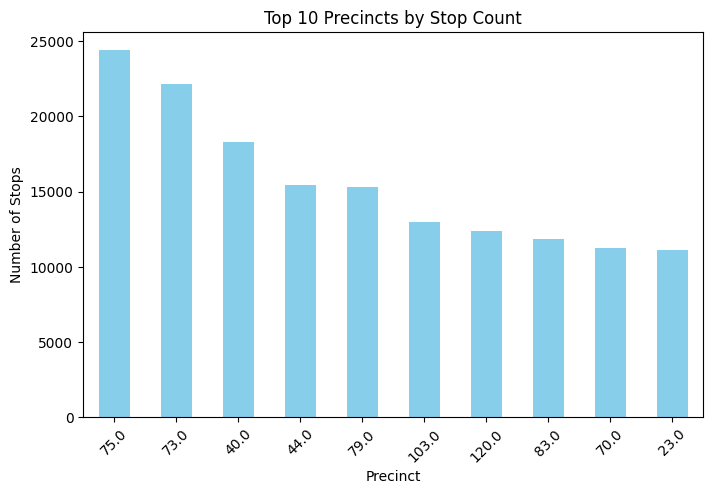

In [12]:
# Top 10 Precint
top_precincts = df['precinct'].value_counts().head(10)

plt.figure(figsize=(8,5))
top_precincts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Precincts by Stop Count")
plt.xlabel("Precinct")
plt.ylabel("Number of Stops")
plt.xticks(rotation=45)
plt.show()

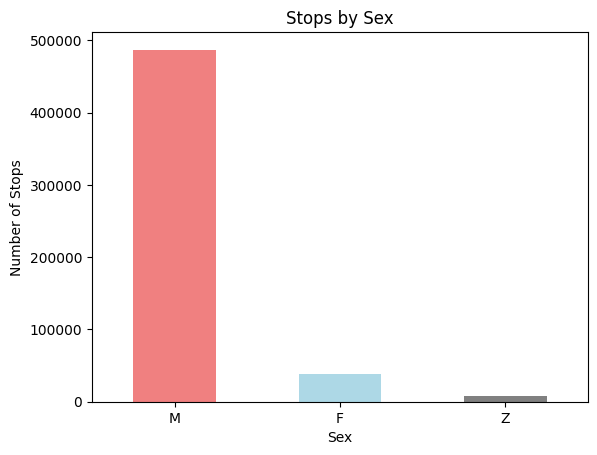

In [13]:
# Sex
df['sex'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue', 'gray'])
plt.title("Stops by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Stops")
plt.xticks(rotation=0)
plt.show()

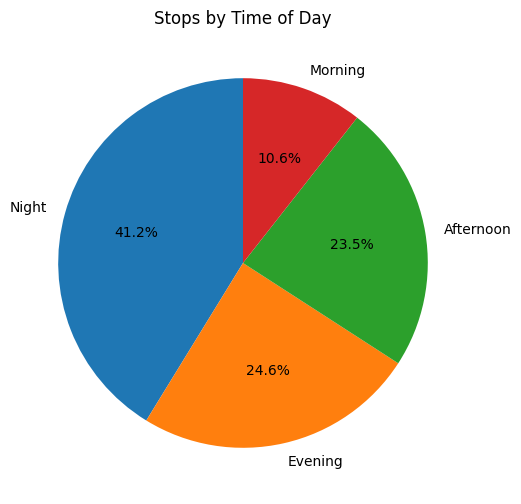

In [14]:
# Time of day
time_counts = df['time_of_day'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Stops by Time of Day")
plt.show()

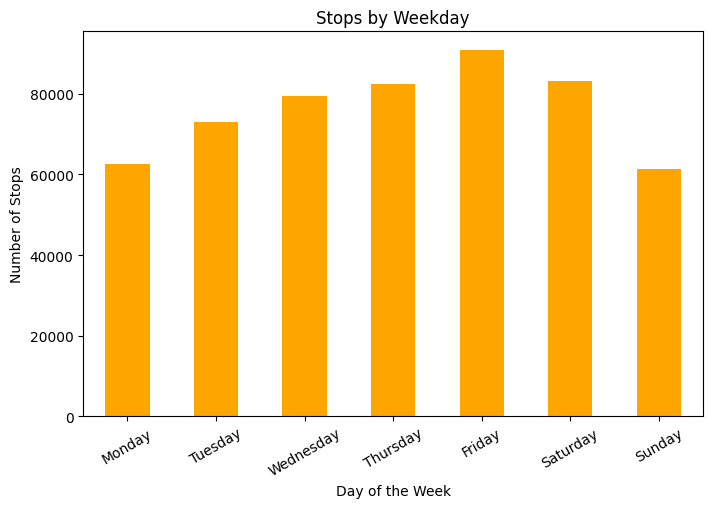

In [15]:
# Weekday
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_counts = df['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(8,5))
weekday_counts.plot(kind='bar', color='orange')
plt.title("Stops by Weekday")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Stops")
plt.xticks(rotation=30)
plt.show()

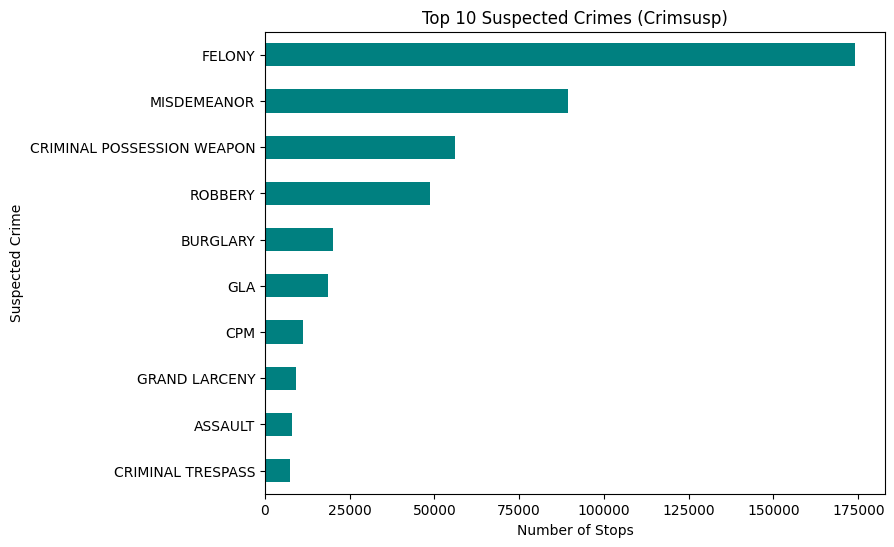

In [17]:
# Top 10 suspected crimes
top_crimes = df['crimsusp'].value_counts().head(10)

plt.figure(figsize=(8,6))
top_crimes.plot(kind='barh', color='teal')
plt.title("Top 10 Suspected Crimes (Crimsusp)")
plt.xlabel("Number of Stops")
plt.ylabel("Suspected Crime")
plt.gca().invert_yaxis()  # largest crime at top
plt.show()

### Relationship between attributes

In [20]:
import seaborn as sns

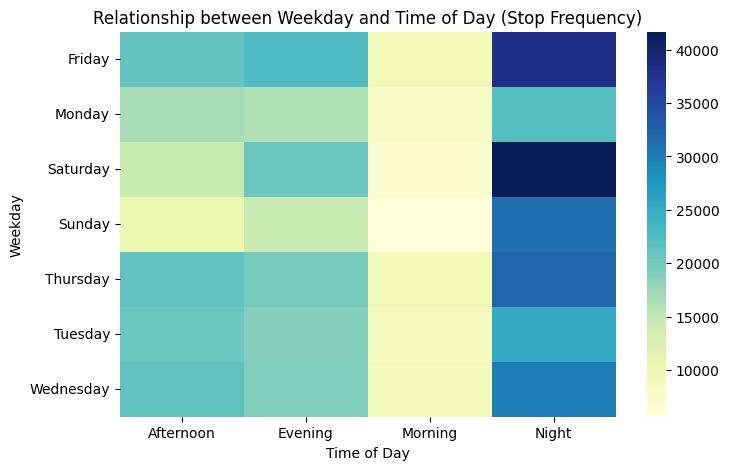

In [21]:
# Time of day vs. Weekday (Cross-tabulation)

pd.crosstab(df['weekday'], df['time_of_day'])

ct = pd.crosstab(df['weekday'], df['time_of_day'])
plt.figure(figsize=(8,5))
sns.heatmap(ct, cmap='YlGnBu', annot=False)
plt.title("Relationship between Weekday and Time of Day (Stop Frequency)")
plt.xlabel("Time of Day")
plt.ylabel("Weekday")
plt.show()

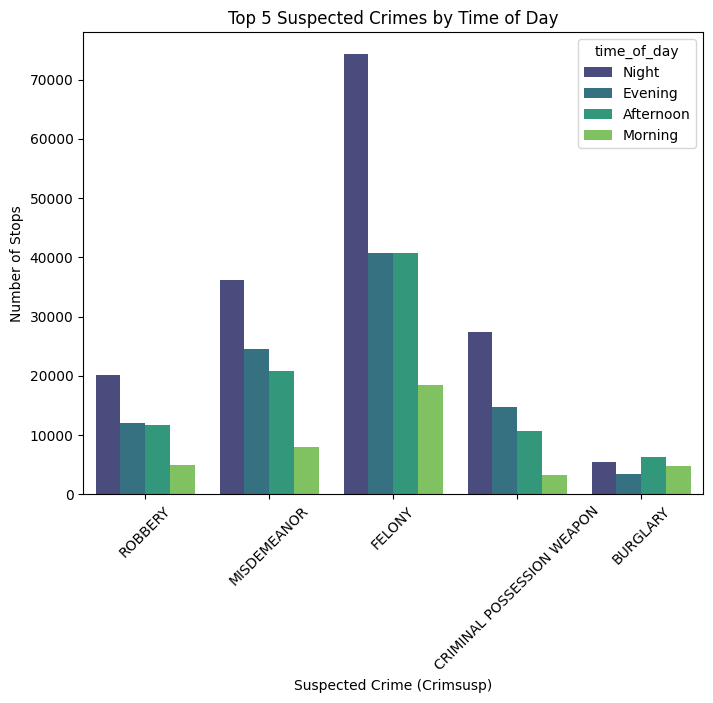

In [24]:
# Precinct vs. Crime suspecion
top_crimes = df['crimsusp'].value_counts().head(5).index
subset = df[df['crimsusp'].isin(top_crimes)]

plt.figure(figsize=(8,6))
sns.countplot(data=subset, x='crimsusp', hue='time_of_day', palette='viridis')
plt.title("Top 5 Suspected Crimes by Time of Day")
plt.xlabel("Suspected Crime (Crimsusp)")
plt.ylabel("Number of Stops")
plt.xticks(rotation=45)
plt.show()

crimsusp  ,IAD  ,ISD  .FELONY  .GRAND LARCENY FRM AUTO  .SUSPECTED RPBBERY  \
sex                                                                          
F            1     0        0                        0                   1   
M            0     4        1                        1                   0   
Z            0     0        0                        0                   0   

crimsusp  / CPW  10-10 MALE W/ GUN (CPW)  10-10 MAN W/GUN (CPW)  \
sex                                                               
F             0                        0                      0   
M             1                        1                      1   
Z             0                        0                      0   

crimsusp  10-10 SHOTS FIRES  10-11 BURG  ...  VOOP CRIM CONTEMPT  VOP  VPW  \
sex                                      ...                                 
F                         0           0  ...                   0    0    0   
M                         1           1

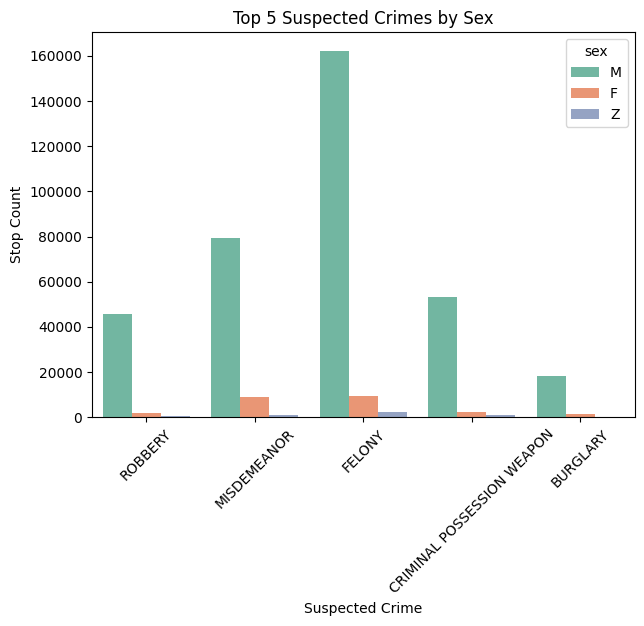

In [26]:
# Sex vs. crime suspicion
ct_sex_crime = pd.crosstab(df['sex'], df['crimsusp'])
print(ct_sex_crime.head())

# Optional visualization for top crime types
top_crimes = df['crimsusp'].value_counts().head(5).index
subset = df[df['crimsusp'].isin(top_crimes)]

plt.figure(figsize=(7,5))
sns.countplot(data=subset, x='crimsusp', hue='sex', palette='Set2')
plt.title("Top 5 Suspected Crimes by Sex")
plt.xlabel("Suspected Crime")
plt.ylabel("Stop Count")
plt.xticks(rotation=45)
plt.show()

precinct
1.0     Afternoon
5.0     Afternoon
6.0         Night
7.0         Night
9.0         Night
10.0        Night
13.0    Afternoon
14.0    Afternoon
17.0    Afternoon
18.0        Night
Name: time_of_day, dtype: object


C:\Users\ndang\AppData\Local\Temp\ipykernel_30300\2401410966.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dominant_times.index, y=dominant_times.values, palette='coolwarm')


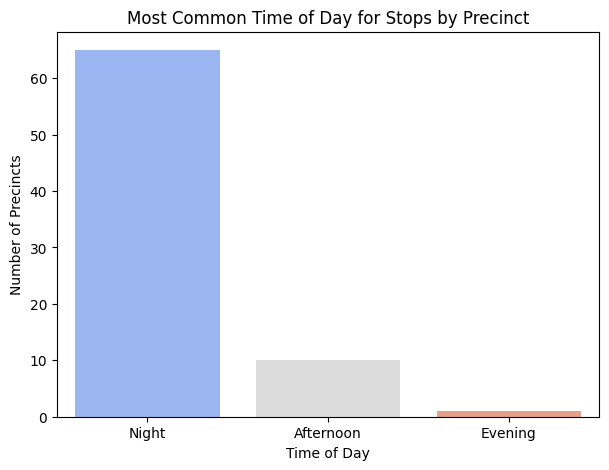

In [29]:
# Precinct vs. time of day
grouped = df.groupby('precinct')['time_of_day'].agg(lambda x: x.mode()[0])
print(grouped.head(10))
dominant_times = grouped.value_counts()

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x=dominant_times.index, y=dominant_times.values, palette='coolwarm')
plt.title("Most Common Time of Day for Stops by Precinct")
plt.xlabel("Time of Day")
plt.ylabel("Number of Precincts")
plt.show()

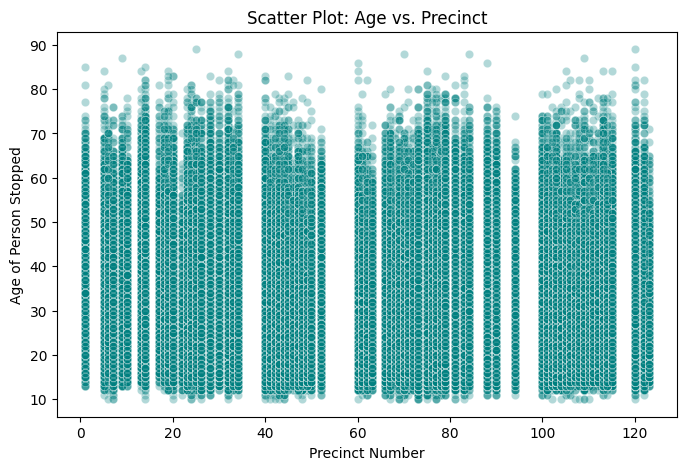

In [31]:
# Age vs. precinct
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['precinct'] = pd.to_numeric(df['precinct'], errors='coerce')

# 3️⃣ Create the scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='precinct', y='age', alpha=0.3, color='teal')

# 4️⃣ Add chart details
plt.title("Scatter Plot: Age vs. Precinct")
plt.xlabel("Precinct Number")
plt.ylabel("Age of Person Stopped")
plt.show()

# Reason for SQF vs force type

In [32]:
# Stop reasons (why the stop happened)
cs_cols = [c for c in df.columns if c.startswith('cs_')]

# Force types (how force was applied)
pf_cols = [c for c in df.columns if c.startswith('pf_')]

# Create a summary DataFrame
results = pd.DataFrame(index=cs_cols, columns=pf_cols)

# Calculate average rate (percentage) for each combination
for reason in cs_cols:
    for force in pf_cols:
        # mean() of 1/0 gives proportion of times force was used when that reason = 1
        rate = df.loc[df[reason] == 1, force].mean()
        results.loc[reason, force] = round(rate * 100, 2)

results = results.fillna(0)  # fill missing with 0
print(results.head())

          pf_hands  pf_wall  pf_grnd  pf_drwep  pf_ptwep  pf_baton  pf_hcuff  \
cs_objcs     13.36     2.93     0.85      0.41      0.46      0.01      9.23   
cs_descr     16.13     4.31     0.85      0.77      0.66      0.02      7.84   
cs_casng     11.48     1.84     0.19      0.09      0.09      0.01      1.79   
cs_lkout     12.46     2.13     0.19      0.09      0.10      0.01      1.95   
cs_cloth     19.04     3.34     0.51      0.32      0.35      0.01      2.99   

          pf_pepsp  pf_other  
cs_objcs      0.04      0.75  
cs_descr      0.02      0.46  
cs_casng      0.01      0.87  
cs_lkout      0.01      0.57  
cs_cloth      0.00      0.26  


C:\Users\ndang\AppData\Local\Temp\ipykernel_30300\767593103.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  results = results.fillna(0)  # fill missing with 0


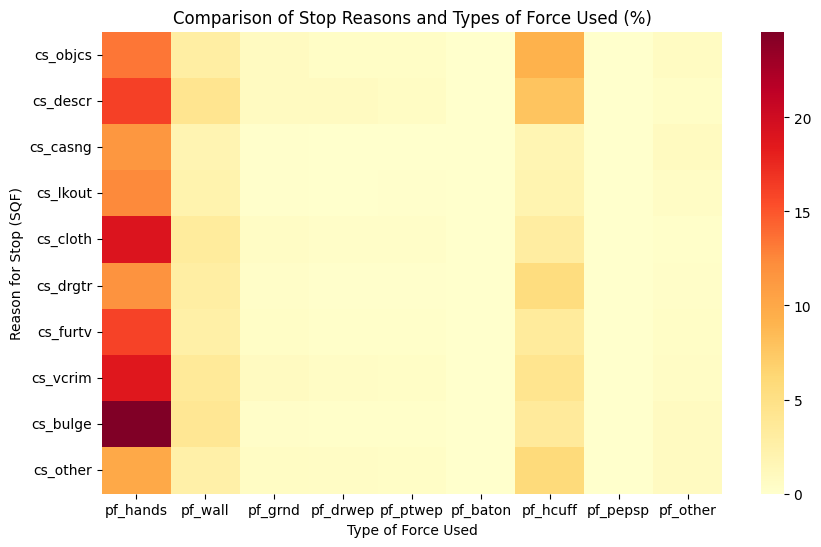

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(results.astype(float), cmap='YlOrRd', annot=False)
plt.title("Comparison of Stop Reasons and Types of Force Used (%)")
plt.xlabel("Type of Force Used")
plt.ylabel("Reason for Stop (SQF)")
plt.show()